In [92]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from bCurve import Bezier, Point, Spline
import numpy as np
from PIL import Image

In [93]:
def hypot(x, y):
    return (x**2 + y**2)**0.5

def distance(p1, p2):
    return (((p1.x - p2.x) ** 2) + ((p1.y - p2.y) ** 2)) ** 0.5

In [127]:
demo_spline = Spline([Bezier(Point(0, 0), Point(2, 4), Point(5, 2), Point(6, 4))])

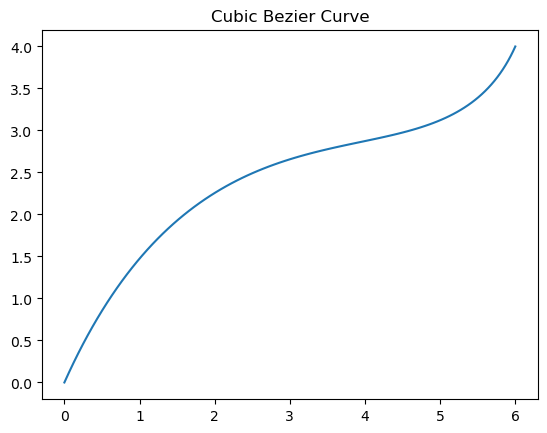

In [129]:
x, y = demo_spline.get_points(0, 1, 100)
plt.plot(x, y)
plt.title('Cubic Bezier Curve')
plt.show()

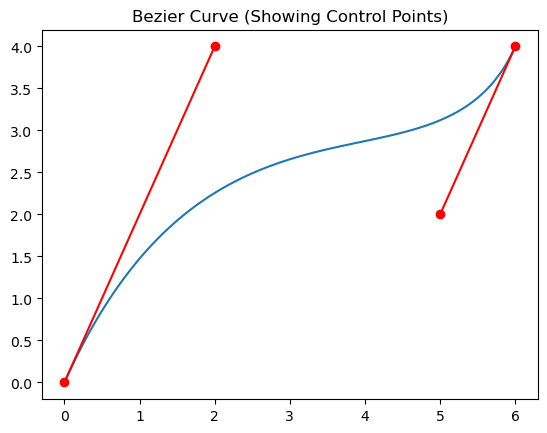

In [131]:
x, y = demo_spline.get_points(0, 1, 100)
plt.plot(x, y)

x_control, y_control = demo_spline.get_control_lines()
x_control_p, y_control_p = demo_spline.get_control_points()

for x_control_l, y_control_l in zip(x_control, y_control):
    plt.plot(x_control_l, y_control_l, color='r')

plt.scatter(x_control_p, y_control_p, color='r')
plt.title('Bezier Curve (Showing Control Points)')
plt.show()

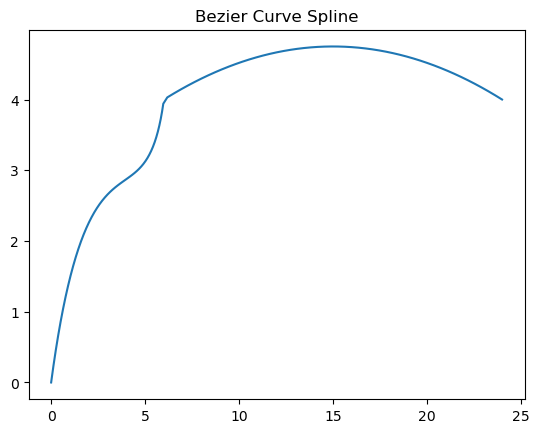

In [133]:
demo_spline = Spline([
    Bezier(Point(0, 0), Point(2, 4), Point(5, 2), Point(6, 4)),
    Bezier(Point(6, 4), Point(12, 5), Point(18, 5), Point(24, 4))
])

x, y = demo_spline.get_points(0, 1, 100)
plt.title('Bezier Curve Spline')
plt.plot(x, y)

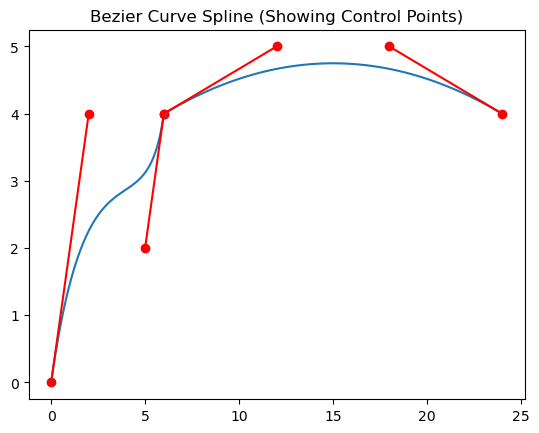

In [98]:
plt.plot(x, y)
x_control, y_control = demo_spline.get_control_lines()
x_control_p, y_control_p = demo_spline.get_control_points()

for x_control_l, y_control_l in zip(x_control, y_control):
    plt.plot(x_control_l, y_control_l, color='r')

plt.scatter(x_control_p, y_control_p, color='r')
plt.title('Bezier Curve Spline (Showing Control Points)')
plt.show()

In [99]:
x, y = demo_spline.get_points(0, 1, 100)
x_d, y_d = demo_spline.get_first_derivatives(0, 1, 100)
x_d2, y_d2 = demo_spline.get_second_derivatives(0, 1, 100)

MovieWriter ffmpeg unavailable; using Pillow instead.


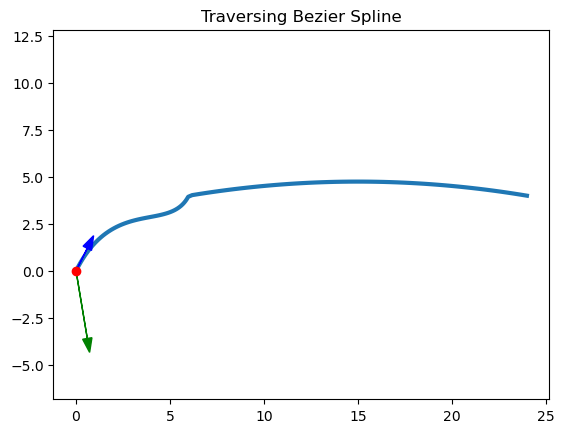

In [100]:
fig, ax = plt.subplots()
ax.plot(x, y, lw=3, zorder=0)

# animated_track, = ax.plot([], [], lw=3)
v_scale = 0.1
animated_point, = ax.plot(x[0], y[0], color='r', marker='o', markersize=6, zorder=15)
animated_velocity = ax.arrow(x[0], y[0], x_d[0]*v_scale, y_d[0]*v_scale, color='b', head_width=0.5, zorder=10)
animated_acceleration = ax.arrow(x[0], y[0], x_d2[0]*v_scale, y_d2[0]*v_scale, color='g', head_width=0.5, zorder=10)


def update(frame):
    # animated_plot.set_linewidth(3)
    # animated_track.set_data(x[:frame], y[:frame])
    animated_velocity.set_data(x=x[frame], y=y[frame], dx=x_d[frame]*v_scale, dy=y_d[frame]*v_scale)
    animated_acceleration.set_data(x=x[frame], y=y[frame], dx=x_d2[frame]*v_scale, dy=y_d2[frame]*v_scale)
    animated_point.set_data([x[frame]], [y[frame]])

    return animated_point,


animation = FuncAnimation(
        fig=fig,
        func=update,
        frames=len(x),
        interval=1
)
ax.axis('equal')
ax.set_ylim([-6, 12])
ax.set_title('Traversing Bezier Spline')
animation.save('report_demo_traverse.gif')

Text(0, 0.5, 'Velocity')

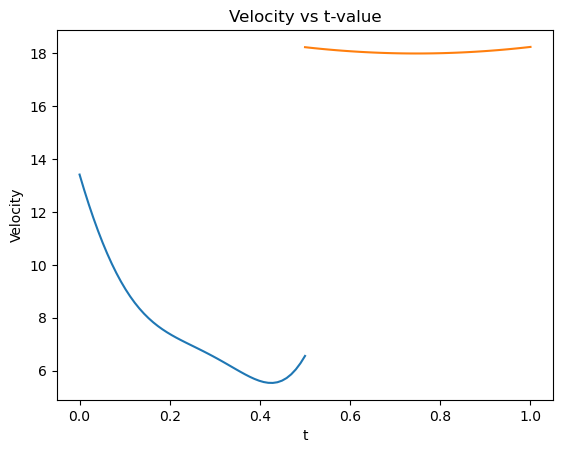

In [101]:
plt.plot(np.linspace(0, 0.5, 50), [hypot(x, y) for x, y in zip(x_d[:50], y_d[:50])])
plt.plot(np.linspace(0.5, 1, 50), [hypot(x, y) for x, y in zip(x_d[50:], y_d[50:])])
plt.title('Velocity vs t-value')
plt.xlabel('t')
plt.ylabel('Velocity')

In [102]:
cont_spline = demo_spline.make_continuous(inplace=False)

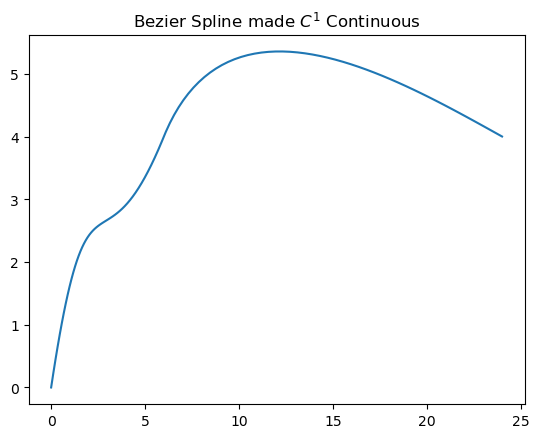

In [103]:
x, y = demo_spline.get_points(0, 1, 100)
plt.title('Bezier Spline made $C^1$ Continuous')
plt.plot(x, y)

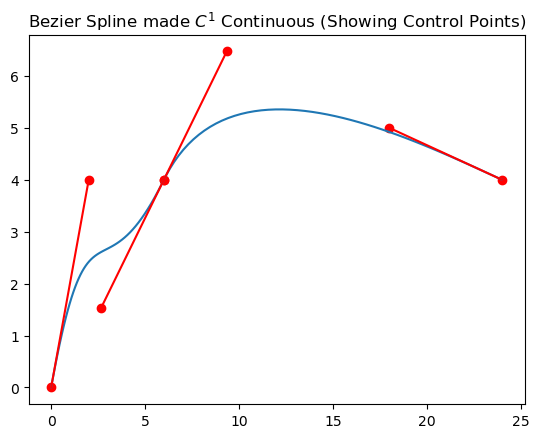

In [104]:
plt.plot(x, y)
x_control, y_control = cont_spline.get_control_lines()
x_control_p, y_control_p = cont_spline.get_control_points()

for x_control_l, y_control_l in zip(x_control, y_control):
    plt.plot(x_control_l, y_control_l, color='r')

plt.scatter(x_control_p, y_control_p, color='r')
plt.title('Bezier Spline made $C^1$ Continuous (Showing Control Points)')
plt.show()

In [105]:
x, y = cont_spline.get_points(0, 1, 100)
x_d, y_d = cont_spline.get_first_derivatives(0, 1, 100)
x_d2, y_d2 = cont_spline.get_second_derivatives(0, 1, 100)

MovieWriter ffmpeg unavailable; using Pillow instead.


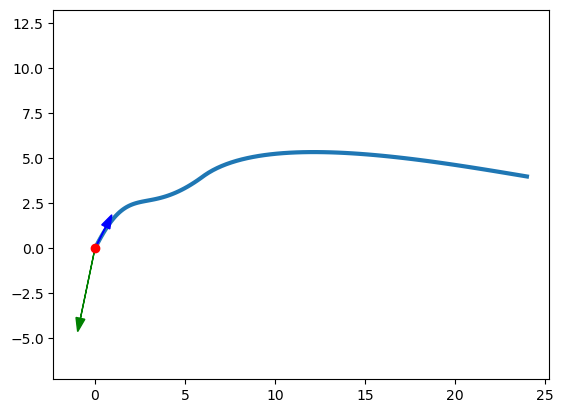

In [106]:
fig, ax = plt.subplots()
ax.plot(x, y, lw=3, zorder=0)

# animated_track, = ax.plot([], [], lw=3)
v_scale = 0.1
animated_point, = ax.plot(x[0], y[0], color='r', marker='o', markersize=6, zorder=15)
animated_velocity = ax.arrow(x[0], y[0], x_d[0]*v_scale, y_d[0]*v_scale, color='b', head_width=0.5, zorder=10)
animated_acceleration = ax.arrow(x[0], y[0], x_d2[0]*v_scale, y_d2[0]*v_scale, color='g', head_width=0.5, zorder=10)


def update(frame):
    # animated_plot.set_linewidth(3)
    # animated_track.set_data(x[:frame], y[:frame])
    animated_velocity.set_data(x=x[frame], y=y[frame], dx=x_d[frame]*v_scale, dy=y_d[frame]*v_scale)
    animated_acceleration.set_data(x=x[frame], y=y[frame], dx=x_d2[frame]*v_scale, dy=y_d2[frame]*v_scale)
    animated_point.set_data([x[frame]], [y[frame]])

    return animated_point,


animation = FuncAnimation(
        fig=fig,
        func=update,
        frames=len(x),
        interval=1
)
ax.axis('equal')
ax.set_ylim([-6, 12])
animation.save('report_c_demo_traverse.gif')

Text(0, 0.5, 'Velocity')

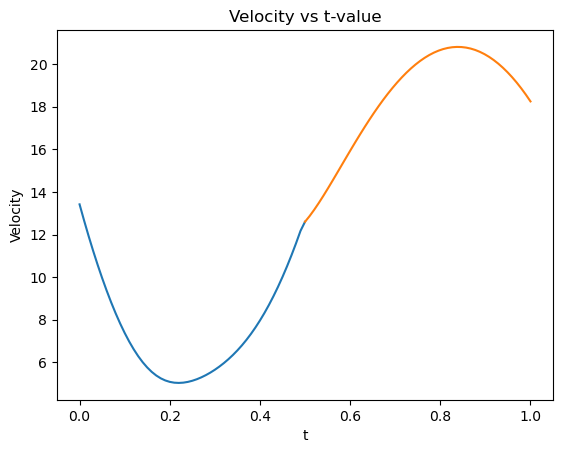

In [107]:
plt.plot(np.linspace(0, 0.5, 51), [hypot(x, y) for x, y in zip(x_d[:51], y_d[:51])])
plt.plot(np.linspace(0.5, 1, 50), [hypot(x, y) for x, y in zip(x_d[50:], y_d[50:])])
plt.title('Velocity vs t-value')
plt.xlabel('t')
plt.ylabel('Velocity')

Text(0, 0.5, 'Acceleration')

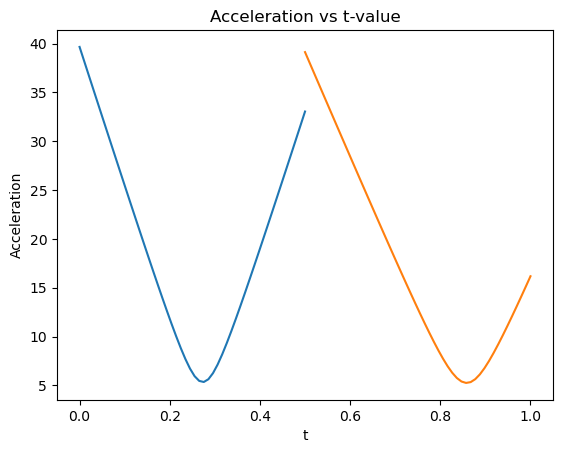

In [108]:
plt.plot(np.linspace(0, 0.5, 50), [hypot(x, y) for x, y in zip(x_d2[:50], y_d2[:50])])
plt.plot(np.linspace(0.5, 1, 50), [hypot(x, y) for x, y in zip(x_d2[50:], y_d2[50:])])
plt.title('Acceleration vs t-value')
plt.xlabel('t')
plt.ylabel('Acceleration')